In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_watermark_roc_and_tpr(watermarked_df: pd.DataFrame, unwatermarked_df: pd.DataFrame):
    # Extract the watermark scores from both DataFrames
    watermarked_scores = watermarked_df['zscore']
    unwatermarked_scores = unwatermarked_df['watermark_score']
    unwatermarked_scores = unwatermarked_scores[:len(watermarked_scores)]
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])

    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def plot_watermark_roc_and_tpr_z(watermarked_scores, unwatermarked_df: pd.DataFrame):
    watermarked_scores = [float(score) for score in watermarked_scores]
    
    # Ensure unwatermarked_scores is a list of floats
    unwatermarked_scores = unwatermarked_df['watermark_score'].astype(float).tolist()
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])

    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def plot_watermark_roc_and_tpr_z_alt(watermarked_scores, unwatermarked_df: pd.DataFrame):
    unwatermarked_scores = unwatermarked_df['watermark_score']

    unwatermarked_scores = unwatermarked_scores[:len(watermarked_scores)]
    
    # Combine the scores
    all_scores = np.concatenate([watermarked_scores, unwatermarked_scores])


    # Create labels: 1 for watermarked, 0 for unwatermarked
    labels = np.concatenate([np.ones(len(watermarked_scores)), np.zeros(len(unwatermarked_scores))])

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(labels, all_scores)
    auc_score = roc_auc_score(labels, all_scores)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Watermark Detection')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Print the AUC score
    print(f"AUC Score: {auc_score:.2f}")
    
    # Define the target FPR values
    target_fprs = [0.1, 0.01, 0.001]

    # Initialize dictionary to store TPRs at specific FPR values
    tpr_at_fprs = {}

    # Iterate over the target FPR values and find the closest FPR in the roc_curve result
    for target_fpr in target_fprs:
        # Find the index where FPR is closest to the target FPR
        idx = np.argmin(np.abs(fpr - target_fpr))
        tpr_at_fprs[target_fpr] = tpr[idx]
        print(f"TPR at FPR = {target_fpr}: {tpr[idx]:.4f}")

    return tpr_at_fprs

def breakup_attacks(df):
    # Break the DF up into smaller DFs
    dfs = []
    current_df = None

    # Iterate over the rows and split on step_num resets
    for i, row in df.iterrows():
        # Check if the step_num resets to -1, indicating a new sequence
        if row['mutation_num'] == -1:
            if current_df is not None and not current_df.empty:
                dfs.append(current_df.reset_index(drop=True))  # Save the current increasing DF
            current_df = pd.DataFrame([row])  # Start a new DataFrame with the reset row
        else:
            # Append the row to the current DataFrame
            current_df = pd.concat([current_df, pd.DataFrame([row])])

    # Add the last DataFrame if it exists and is non-empty
    if current_df is not None and not current_df.empty:
        dfs.append(current_df.reset_index(drop=True))
    
    return dfs

def breakup_attacks_sandpaper(df):
    # Break the DF up into smaller DFs
    dfs = []
    current_df = None

    # Iterate over the rows and split on step_num resets
    for i, row in df.iterrows():
        # Check if the step_num resets to -1, indicating a new sequence
        if i < len(df) - 1 and df.iloc[i + 1]['step_num'] == 0:
            if current_df is not None and not current_df.empty:
                dfs.append(current_df.reset_index(drop=True))  # Save the current increasing DF
            current_df = pd.DataFrame([row])  # Start a new DataFrame with the reset row
        else:
            # Append the row to the current DataFrame
            current_df = pd.concat([current_df, pd.DataFrame([row])])

    # Add the last DataFrame if it exists and is non-empty
    if current_df is not None and not current_df.empty:
        dfs.append(current_df.reset_index(drop=True))
    
    return dfs

def extract_last_mutated_text(df: pd.DataFrame) -> str:
    # Filter the rows where quality_preserved is True
    filtered_df = df[df['quality_preserved'] == True]
    
    # Check if any row exists
    if not filtered_df.empty:
        # Extract the mutated_text from the last valid row
        return filtered_df.iloc[-1]['mutated_text']
    else:
        return None  # Return None if no row matches

def extract_zscore(df: pd.DataFrame) -> str:    
    # Check if any row exists
    if not df.empty:
        # Filter rows where 'watermark_score' is not -1
        valid_rows = df[df['watermark_score'] != -1]
        
        # Check if any valid rows exist
        if not valid_rows.empty:
            # Extract the mutated_text from the last valid row
            return valid_rows.iloc[-1]['watermark_score']
    
    return None  # Return None if no valid row matches
    
def process_dataframes(df_path: str, unwatermarked_df: pd.DataFrame):
    # Read the CSV file
    semstamp_sentence_df = pd.read_csv(df_path)

    # Break up attacks
    semstamp_sentence_df = breakup_attacks(semstamp_sentence_df)

    # Filter dataframes with at least 5 rows and more than 10 rows where 'quality_preserved' is True
    semstamp_sentence_df = [df for df in semstamp_sentence_df if len(df) >= 5]
    semstamp_sentence_df = [df for df in semstamp_sentence_df if df[df['quality_preserved'] == True].shape[0] > 10]

    # Extract relevant information
    semstamp_sentence_og_texts = [df.iloc[1]['current_text'] for df in semstamp_sentence_df]
    semstamp_sentence_prompts = [df.iloc[-1]['prompt'] for df in semstamp_sentence_df]
    semstamp_sentence_mutated_texts = [extract_last_mutated_text(df) for df in semstamp_sentence_df]
    semstamp_sentence_zscores = [extract_zscore(df) for df in semstamp_sentence_df]

    # Plot the ROC and TPR vs Z-scores
    plot_watermark_roc_and_tpr_z(semstamp_sentence_zscores, unwatermarked_df)

    # plot_watermark_roc_and_tpr_z_alt(semstamp_sentence_zscores, unwatermarked_df)

    # Return relevant information if needed
    # return semstamp_sentence_og_texts, semstamp_sentence_prompts, semstamp_sentence_mutated_texts, semstamp_sentence_zscores

def aggregate_position_wise_means_unnormalized(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['watermark_score'] != -1) & (df['watermark_score'].notna())]['watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists
    max_len = max(len(lst) for lst in extracted_lists)
    # max_len = 10

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst + [np.nan] * (max_len - len(lst)) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    return position_means

def aggregate_position_wise_means_unnormalized_one_less(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['watermark_score'] != -1) & (df['watermark_score'].notna())]['watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists
    max_len = max(len(lst) for lst in extracted_lists) - 1
    # max_len = 10

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst + [np.nan] * (max_len - len(lst)) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    print(len(position_means))

    return position_means

def aggregate_position_wise_means(dfs):
    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [
        df[(df['normalized_watermark_score'] != -1) & (df['normalized_watermark_score'].notna())]['normalized_watermark_score'].tolist()
        for df in dfs
    ]

    # Find the maximum length of extracted lists
    # max_len = max(len(lst) for lst in extracted_lists)
    max_len = 10

    # Pad shorter lists with NaNs so we can aggregate by position
    padded_lists = [lst + [np.nan] * (max_len - len(lst)) for lst in extracted_lists]

    # Convert to a DataFrame to easily compute the mean for each position
    aggregated_df = pd.DataFrame(padded_lists)

    # Compute the mean for each position, ignoring NaN values
    position_means = aggregated_df.mean()

    return position_means

def plot_position_means(position_means):
    # Plot the means
    plt.figure(figsize=(10, 6))
    plt.plot(position_means, marker='o', linestyle='-', color='b', label='Position-wise mean')
    plt.title('Position-wise Mean of Watermark Scores')
    plt.xlabel('Position in the list')
    plt.ylabel('Mean Watermark Score')
    plt.grid(True)
    plt.legend()
    plt.show()

def count_lists_with_pattern(dfs):
    # Initialize a counter
    count = 0

    # Extract row values where watermark_score is not -1 for each DataFrame
    extracted_lists = [df[df['watermark_score'] != -1]['watermark_score'].tolist() for df in dfs]

    # Check each list for the pattern (score drops below 1 and then jumps to 2)
    for lst in extracted_lists:
        found_below_1 = False  # Flag to track if we have seen a score < 1
        found_jump_to_2 = False  # Flag to track if we have seen the jump to 2 after the drop

        for score in lst:
            if score < 1:
                found_below_1 = True  # Mark that we found a score below 1
            if found_below_1 and score == 2:
                found_jump_to_2 = True  # Mark that we found the jump back to 2
                break  # We only need to find one such jump in the list

        if found_below_1 and found_jump_to_2:
            count += 1  # Increment the counter if the pattern is found

    return count

def plot_position_means_list(position_means_list, labels):
    """Plots multiple position-wise means on the same graph."""
    plt.figure(figsize=(10, 6))

    # Plot each set of position means with its corresponding label
    for position_means, label in zip(position_means_list, labels):
        plt.plot(position_means, marker='o', linestyle='-', label=label)

    # Set up the plot details
    plt.title('Position-wise Mean Watermark Scores')
    plt.xlabel('Position in the list')
    plt.ylabel('Mean Watermark Score')
    plt.grid(True)
    plt.legend()
    plt.show()

In [2]:
semstamp_unwatermarked_df = pd.read_csv('/data2/borito1907/impossibility-watermark/unwatermarked_scores/semstamp_detect_unwatermarked.csv')

semstamp_unwatermarked_mean_watermark = semstamp_unwatermarked_df['watermark_score'].mean()
semstamp_unwatermarked_std_watermark = semstamp_unwatermarked_df['watermark_score'].std()

print(f"Mean of watermark_score: {semstamp_unwatermarked_mean_watermark}")
print(f"Standard deviation of watermark_score: {semstamp_unwatermarked_std_watermark}")


Mean of watermark_score: -0.7281950363003581
Standard deviation of watermark_score: 0.933524266518816


In [3]:
adaptive_unwatermarked_df = pd.read_csv('/data2/borito1907/impossibility-watermark/unwatermarked_scores/adaptive_detect_unwatermarked.csv')

adaptive_unwatermarked_mean_watermark = adaptive_unwatermarked_df['watermark_score'].mean()
adaptive_unwatermarked_std_watermark = adaptive_unwatermarked_df['watermark_score'].std()

print(f"Mean of watermark_score: {adaptive_unwatermarked_mean_watermark}")
print(f"Standard deviation of watermark_score: {adaptive_unwatermarked_std_watermark}")


Mean of watermark_score: 51.60824692338929
Standard deviation of watermark_score: 5.957990385248221


In [4]:
semstamp_watermarked_df = pd.read_csv('/data2/borito1907/impossibility-watermark/data/WQE_semstamp/dev.csv')

In [5]:
adaptive_watermarked_df = pd.read_csv('/data2/borito1907/impossibility-watermark/data/WQE_adaptive/dev.csv')

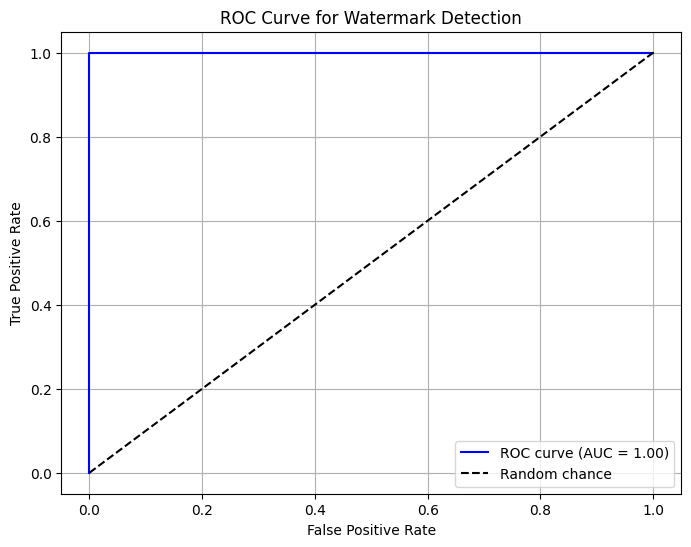

AUC Score: 1.00
TPR at FPR = 0.1: 1.0000
TPR at FPR = 0.01: 1.0000
TPR at FPR = 0.001: 0.0000


{0.1: 1.0, 0.01: 1.0, 0.001: 0.0}

In [29]:
plot_watermark_roc_and_tpr(semstamp_watermarked_df, semstamp_unwatermarked_df)

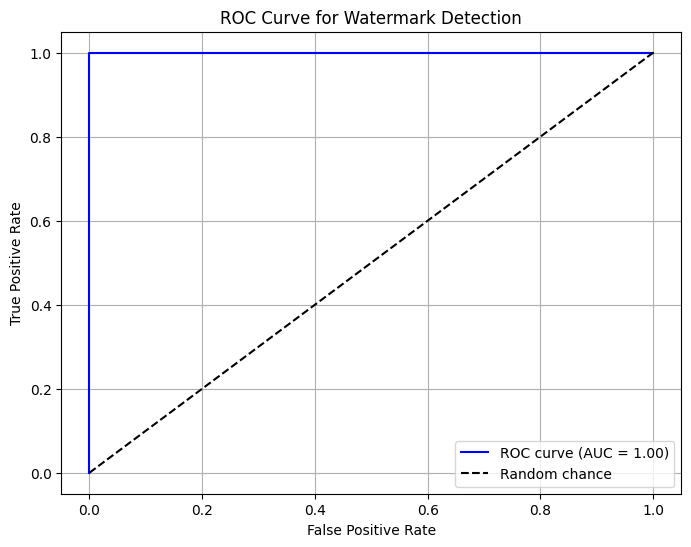

AUC Score: 1.00
TPR at FPR = 0.1: 0.0000
TPR at FPR = 0.01: 0.0000
TPR at FPR = 0.001: 0.0000


{0.1: 0.0, 0.01: 0.0, 0.001: 0.0}

In [30]:
plot_watermark_roc_and_tpr(adaptive_watermarked_df, adaptive_unwatermarked_df)

# SemStamp Attacks

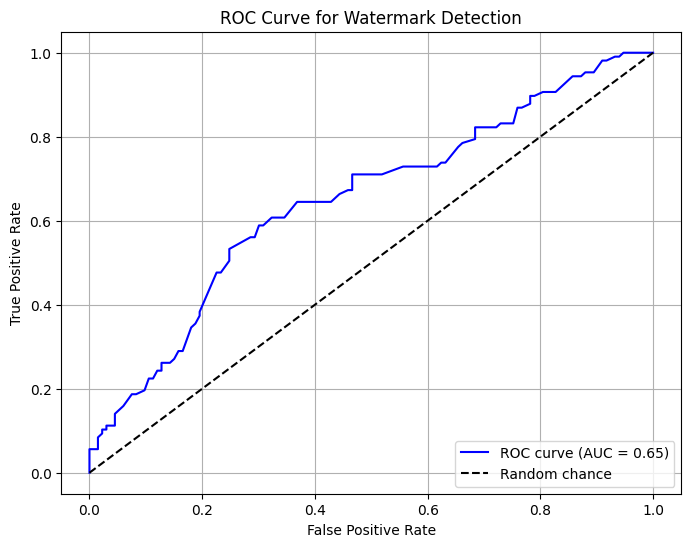

AUC Score: 0.65
TPR at FPR = 0.1: 0.1963
TPR at FPR = 0.01: 0.0561
TPR at FPR = 0.001: 0.0000


In [31]:
process_dataframes('/data2/borito1907/DiffOracle_semstamp_WordMutator_n-steps=1000_attack_results_newest_annotated.csv', semstamp_unwatermarked_df)

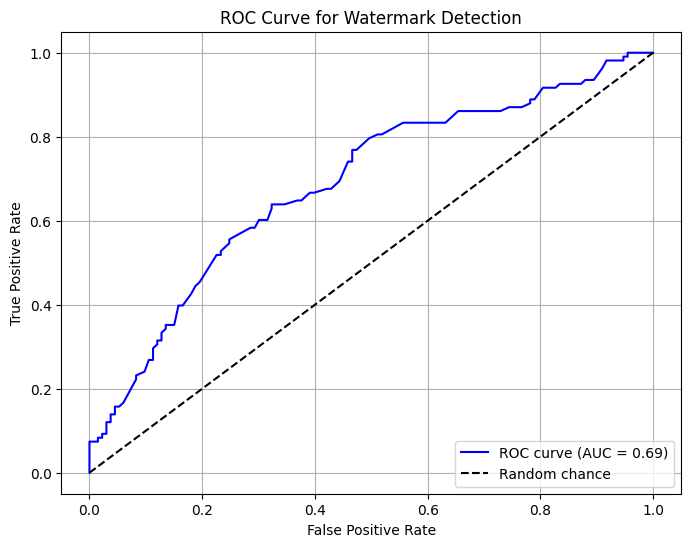

AUC Score: 0.69
TPR at FPR = 0.1: 0.2407
TPR at FPR = 0.01: 0.0741
TPR at FPR = 0.001: 0.0000


In [32]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_SpanMutator_n-steps=200_attack_results_annotated.csv', semstamp_unwatermarked_df)

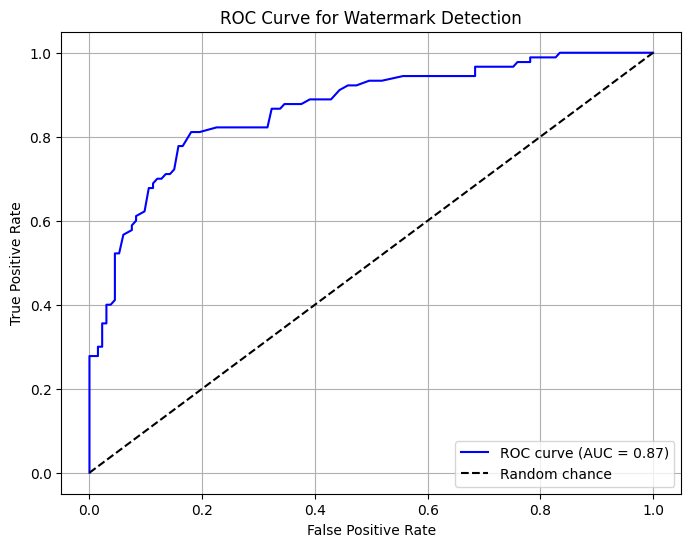

AUC Score: 0.87
TPR at FPR = 0.1: 0.6222
TPR at FPR = 0.01: 0.2778
TPR at FPR = 0.001: 0.0000


In [33]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_SentenceMutator_n-steps=200_attack_results_annotated.csv', semstamp_unwatermarked_df)

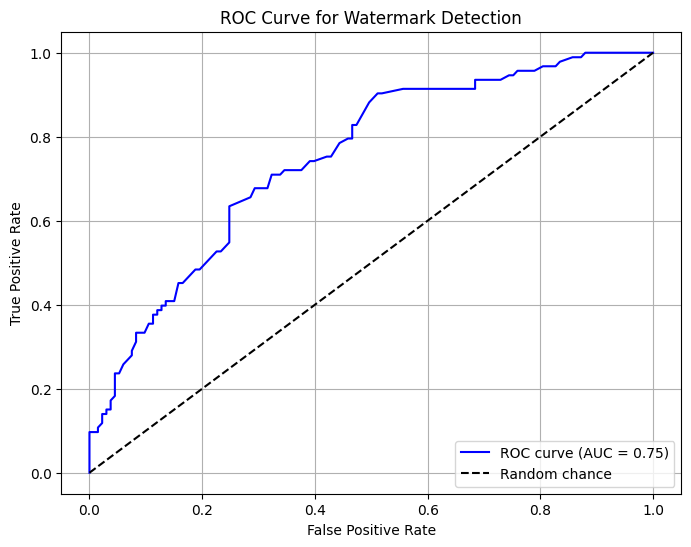

AUC Score: 0.75
TPR at FPR = 0.1: 0.3333
TPR at FPR = 0.01: 0.0968
TPR at FPR = 0.001: 0.0000


In [34]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_Document1StepMutator_n-steps=200_attack_results_annotated.csv', semstamp_unwatermarked_df)

# Adaptive Attacks

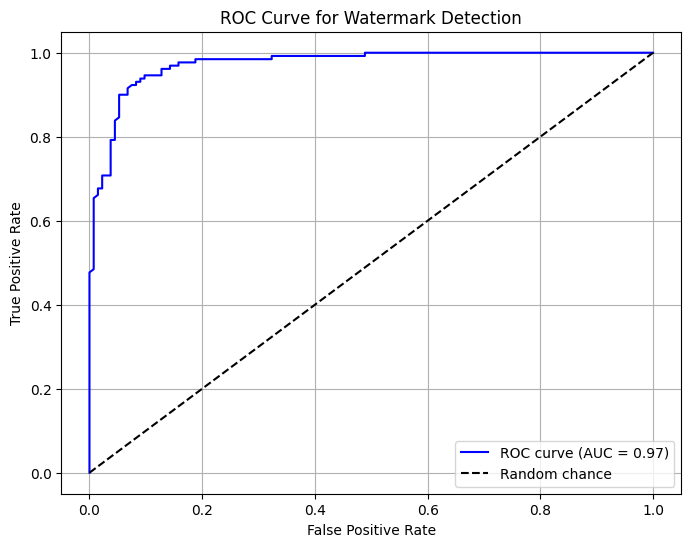

AUC Score: 0.97
TPR at FPR = 0.1: 0.9385
TPR at FPR = 0.01: 0.4846
TPR at FPR = 0.001: 0.0000


In [35]:
process_dataframes('/data2/borito1907/DiffOracle_adaptive_WordMutator_n-steps=1000_attack_results_newest_annotatedfinal.csv', adaptive_unwatermarked_df)

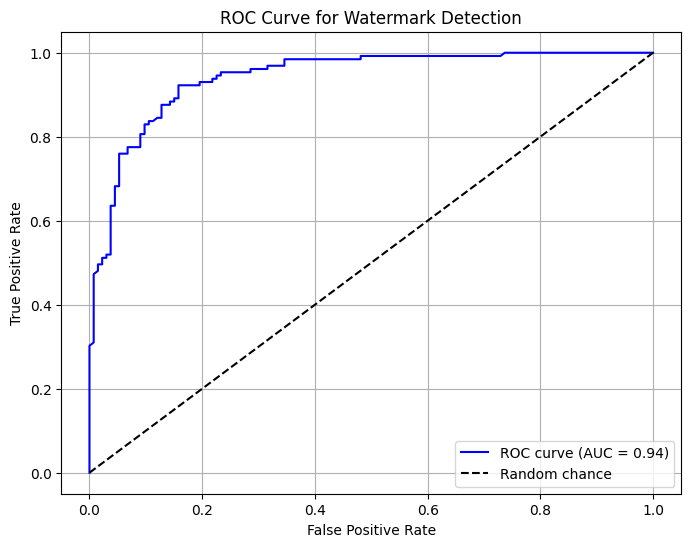

AUC Score: 0.94
TPR at FPR = 0.1: 0.8062
TPR at FPR = 0.01: 0.3101
TPR at FPR = 0.001: 0.0000


In [36]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SpanMutator_n-steps=200_attack_results_annotated.csv', adaptive_unwatermarked_df)

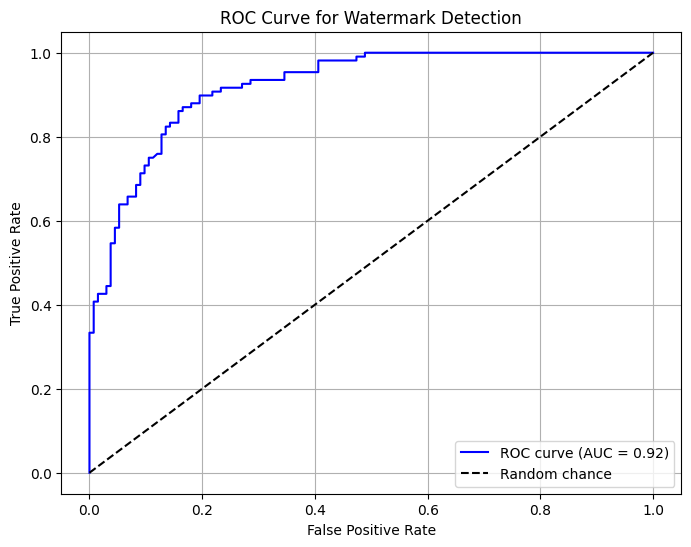

AUC Score: 0.92
TPR at FPR = 0.1: 0.7130
TPR at FPR = 0.01: 0.3333
TPR at FPR = 0.001: 0.0000


In [66]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SentenceMutator_n-steps=200_attack_results_annotated.csv', adaptive_unwatermarked_df)

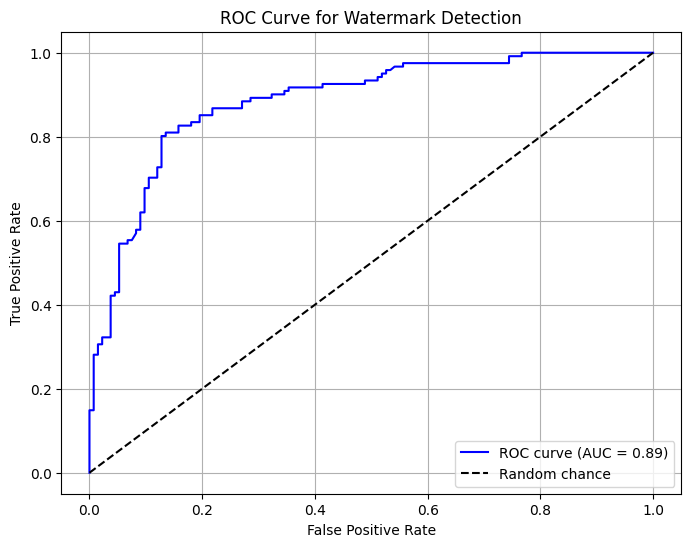

AUC Score: 0.89
TPR at FPR = 0.1: 0.6198
TPR at FPR = 0.01: 0.1488
TPR at FPR = 0.001: 0.0000


In [67]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_Document1StepMutator_n-steps=200_attack_results_annotated.csv', adaptive_unwatermarked_df)

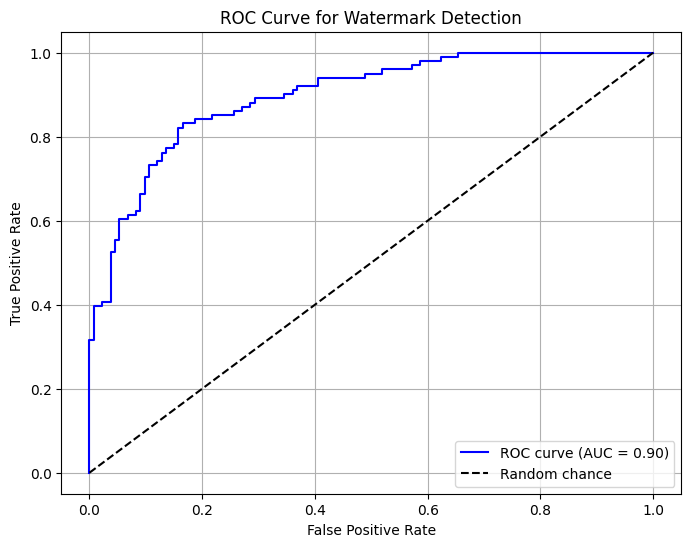

AUC Score: 0.90
TPR at FPR = 0.1: 0.6634
TPR at FPR = 0.01: 0.3168
TPR at FPR = 0.001: 0.0000


In [68]:
process_dataframes('/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_Document2StepMutator_n-steps=200_attack_results_annotated.csv', adaptive_unwatermarked_df)

# Average Normalized Z-Scores

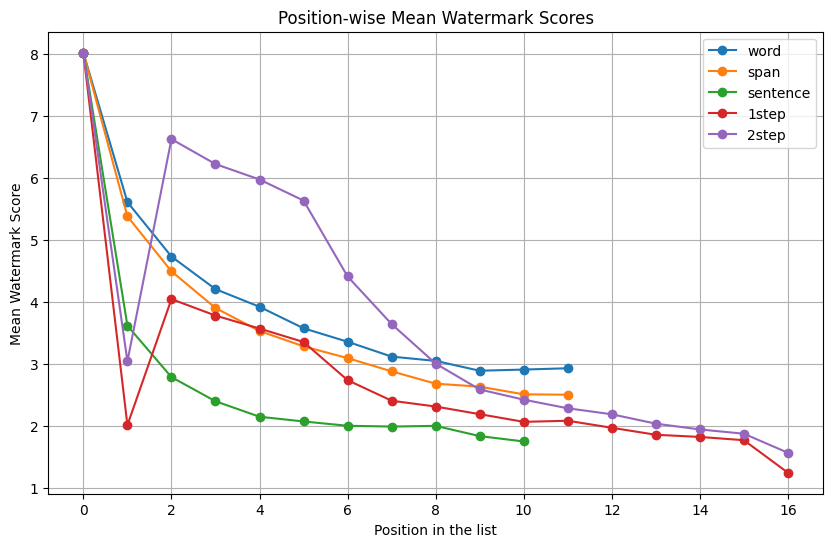

In [81]:
paths = ['/data2/borito1907/DiffOracle_adaptive_WordMutator_n-steps=1000_attack_results_newest_annotatedfinal.csv',
    '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SpanMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SentenceMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_Document1StepMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_Document2StepMutator_n-steps=200_attack_results_annotated.csv'
         ]

position_means_list = []
labels = ['word', 'span', 'sentence', '1step', '2step']

for path in paths:
    df = pd.read_csv(path)
    dfs = breakup_attacks(df)
    

    position_means = aggregate_position_wise_means(dfs)
    position_means_list.append(position_means)

plot_position_means_list(position_means_list, labels)

In [ ]:
paths = ['/data2/borito1907/DiffOracle_semstamp_WordMutator_n-steps=1000_attack_results_newest_annotated.csv',
    '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_SpanMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_SentenceMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_Document1StepMutator_n-steps=200_attack_results_annotated.csv',
         '/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_Document2StepMutator_n-steps=200_attack_results_annotated.csv'
         ]

position_means_list = []
labels = ['word', 'span', 'sentence', '1step', '2step']

for path in paths:
    df = pd.read_csv(path)
    dfs = breakup_attacks(df)
    

    position_means = aggregate_position_wise_means(dfs)
    position_means_list.append(position_means)

plot_position_means_list(position_means_list, labels)

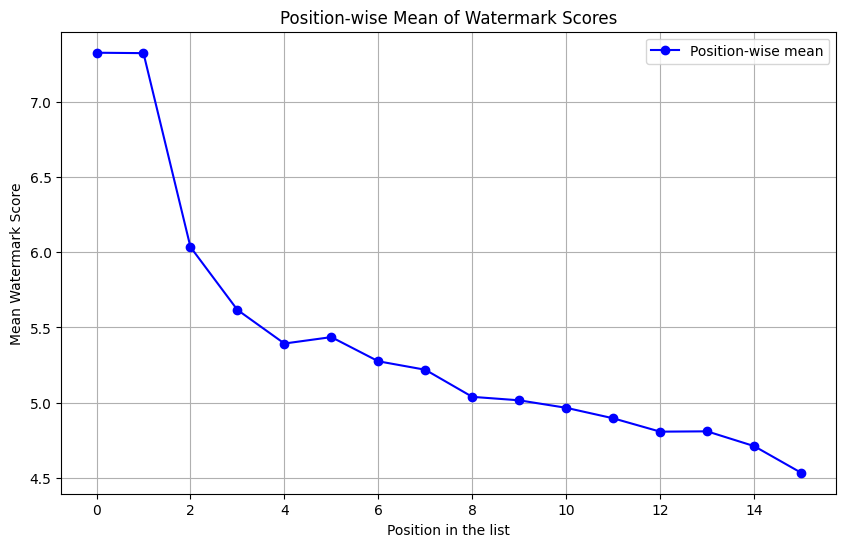

In [12]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_DocumentMutator_n-steps=50_attack_results_v2_annotated1.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means(dfs)
plot_position_means(position_means)

## New DocumentMutator Attacks

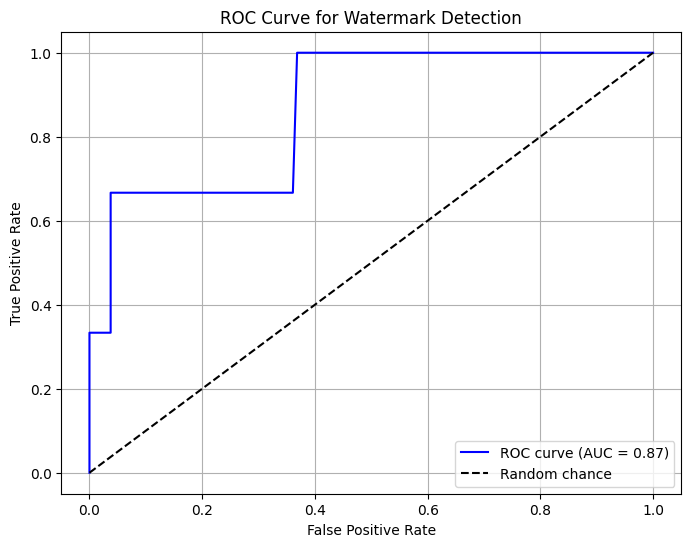

AUC Score: 0.87
TPR at FPR = 0.1: 0.3333
TPR at FPR = 0.01: 0.0000
TPR at FPR = 0.001: 0.0000


In [6]:
process_dataframes("/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_DocumentMutator_n-steps=50_attack_results_v2_annotated.csv", adaptive_unwatermarked_df)

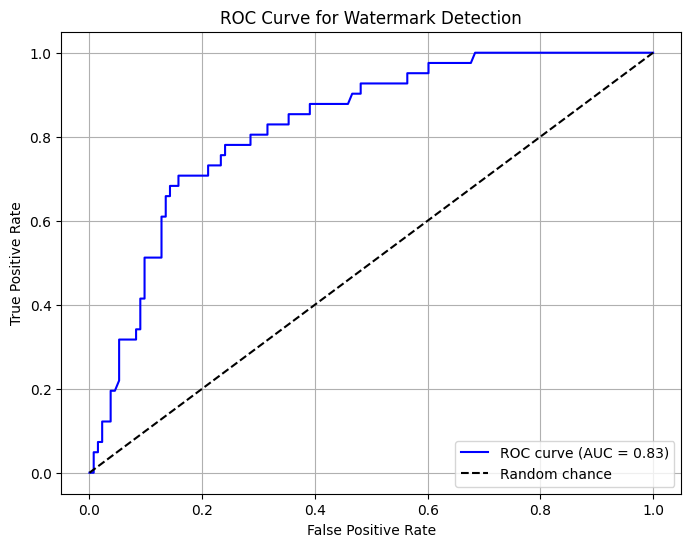

AUC Score: 0.83
TPR at FPR = 0.1: 0.4146
TPR at FPR = 0.01: 0.0000
TPR at FPR = 0.001: 0.0000


In [7]:
process_dataframes("/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_DocumentMutator_n-steps=50_attack_results_annotated.csv", adaptive_unwatermarked_df)

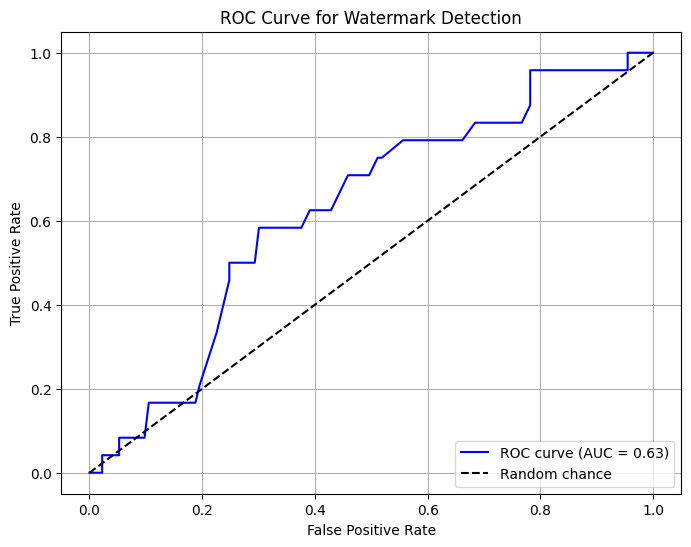

AUC Score: 0.63
TPR at FPR = 0.1: 0.0833
TPR at FPR = 0.01: 0.0000
TPR at FPR = 0.001: 0.0000


In [8]:
process_dataframes("/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_SemStampWatermarker_DocumentMutator_n-steps=50_attack_results_annotated.csv", semstamp_unwatermarked_df)

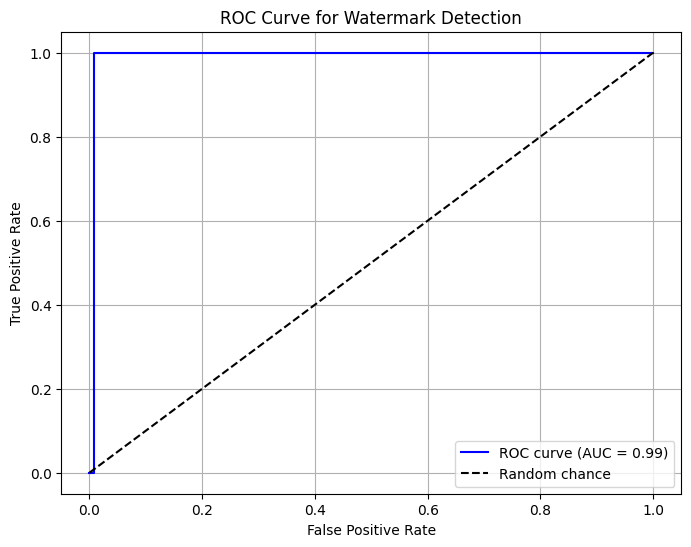

AUC Score: 0.99
TPR at FPR = 0.1: 0.0000
TPR at FPR = 0.01: 0.0000
TPR at FPR = 0.001: 0.0000


In [5]:
process_dataframes("/data2/borito1907/impossibility-watermark/attack_traces/AdaptiveWatermaker_sandpaper_results_annotated.csv", adaptive_unwatermarked_df)

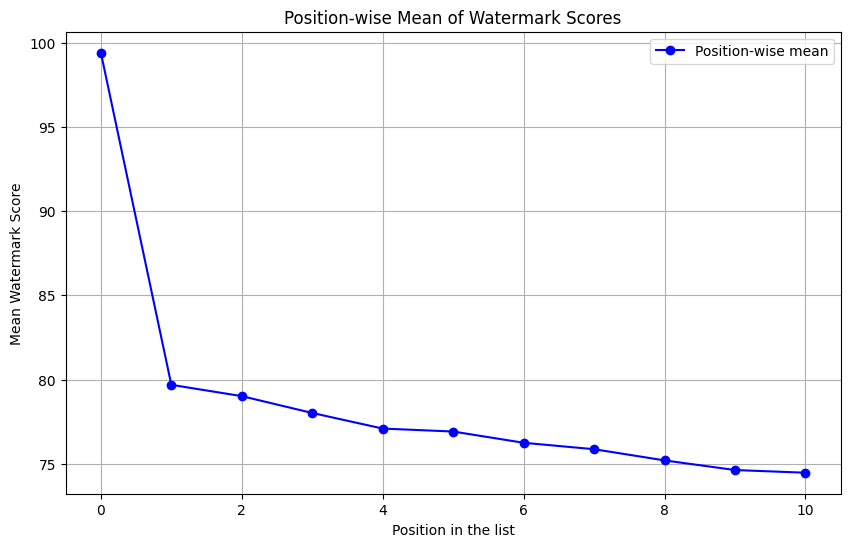

In [7]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/AdaptiveWatermaker_sandpaper_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks_sandpaper(df)

position_means = aggregate_position_wise_means_unnormalized(dfs)
plot_position_means(position_means)

0     99.399281
1     83.675908
2     78.390985
3     74.870806
4     72.658795
5     71.184266
6     70.054393
7     68.783577
8     67.597151
9     67.311447
10    66.573851
11    66.535842
dtype: float64


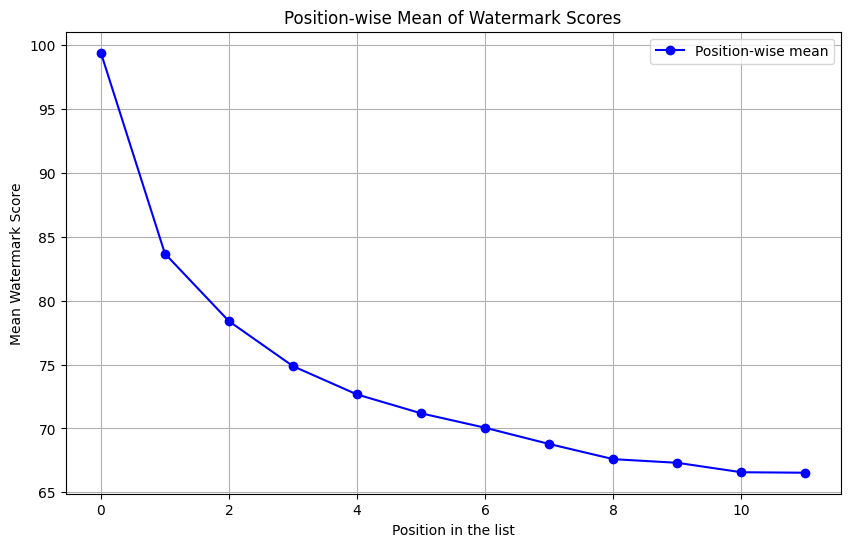

In [35]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SpanMutator_n-steps=200_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized(dfs)
print(position_means)
plot_position_means(position_means)

0     99.399281
1     73.167684
2     68.228520
3     65.906949
4     64.420722
5     63.965964
6     63.550883
7     63.477487
8     63.542672
9     62.559653
10    62.044336
dtype: float64


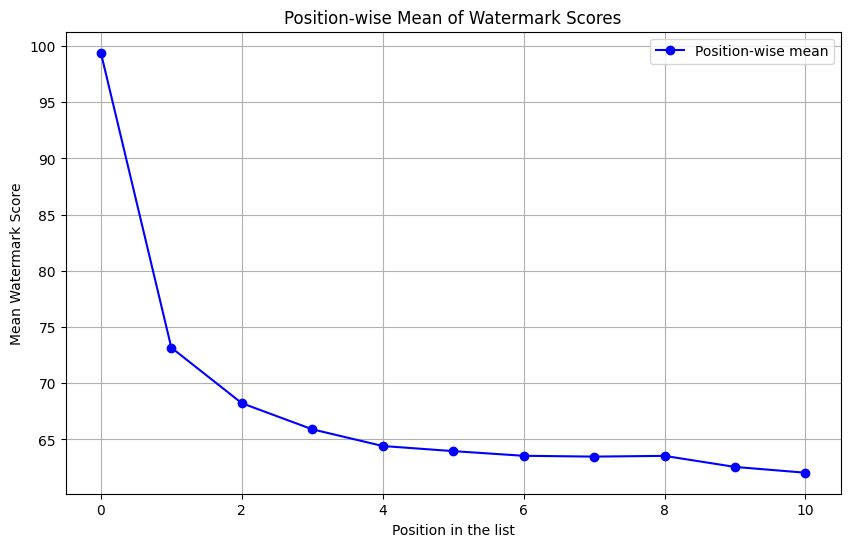

In [34]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_AdaptiveWatermarker_SentenceMutator_n-steps=200_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized(dfs)
print(position_means)
plot_position_means(position_means)

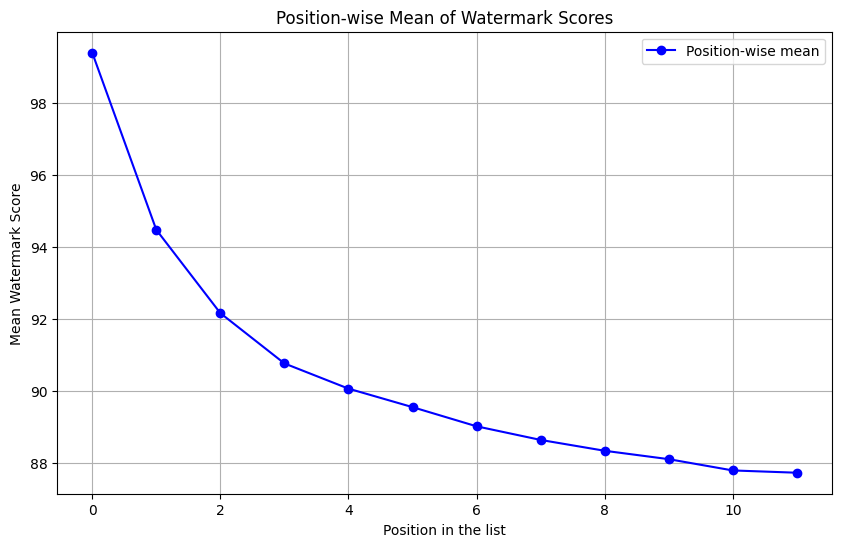

In [ ]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_adaptive_EntropyWordMutator_n-steps=200_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized(dfs)

plot_position_means(position_means)

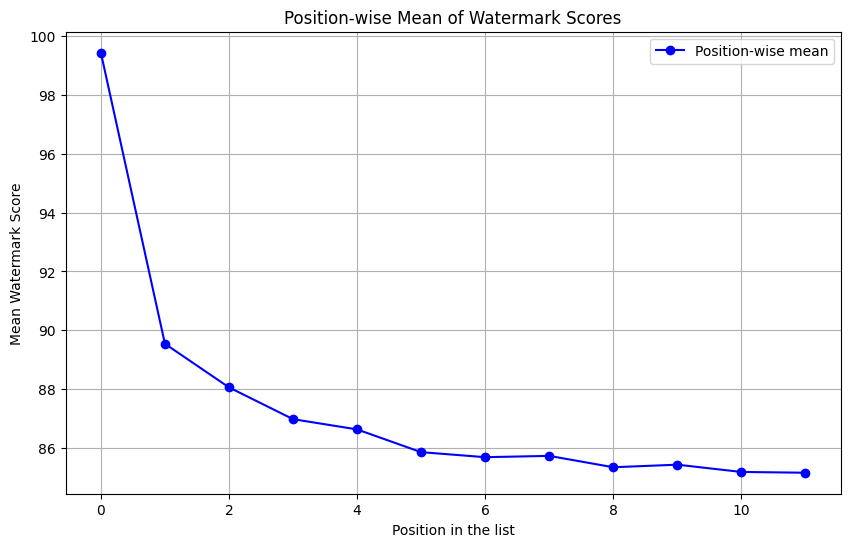

In [8]:
path = "/data2/borito1907/impossibility-watermark/attack_traces/DiffOracle_adaptive_EntropyWordMutator_n-steps=1000_attack_results_annotated.csv"

df = pd.read_csv(path)
dfs = breakup_attacks(df)

position_means = aggregate_position_wise_means_unnormalized(dfs)
plot_position_means(position_means)